In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('haberman.csv')
print(data)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [3]:
print(data.shape)

(306, 4)


In [4]:
print(data['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


**Objective-** It is a classification problem where based on age, no. of positive auxillary nodes, we need to decide patient will survive longer than 5 years or not.

No. of points=306

No. of features=4

No. of classes=2

No. of data-points per class:

class 1- 225

class 2- 81

**Bi-Variate Analysis:**

Using Scatter Plots

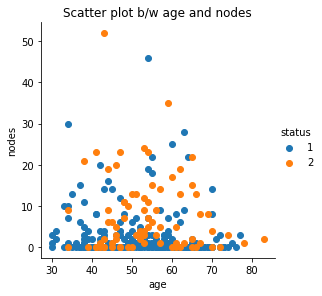

In [5]:
sns.FacetGrid(data, hue='status',height=4).map(plt.scatter,'age','nodes').add_legend()
plt.title('Scatter plot b/w age and nodes')
plt.show()

2. Using pair plots

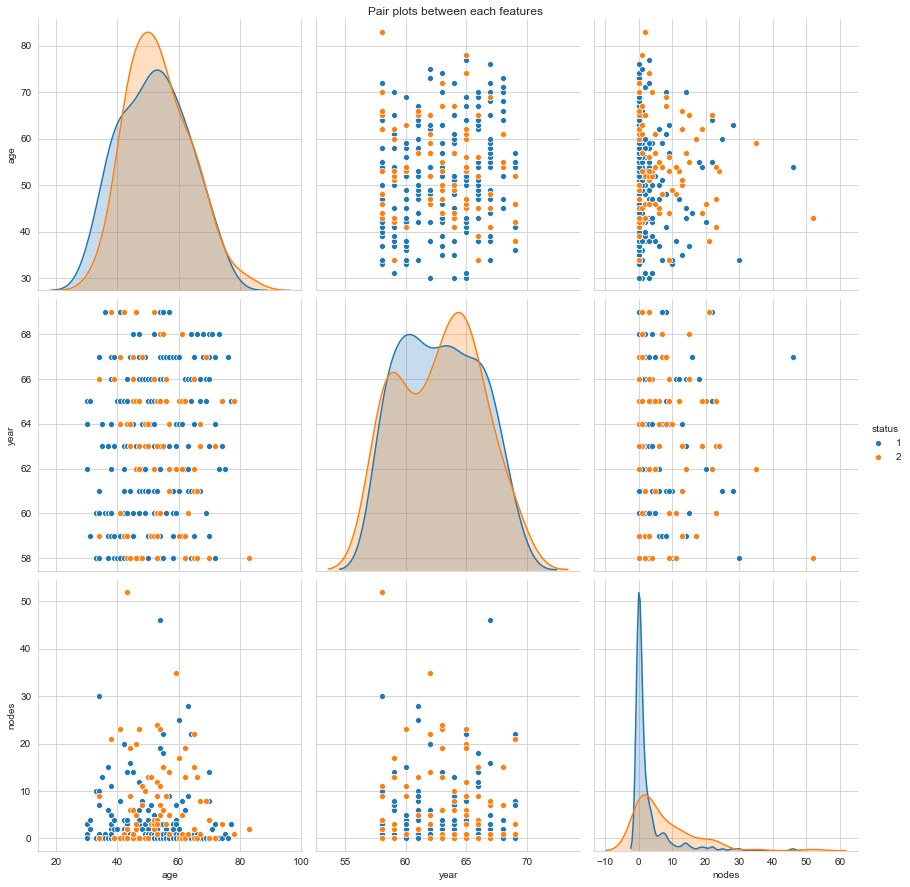

In [6]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='status',height=4)
plt.suptitle('Pair plots between each features',y=1.01)
plt.show()

Some Conclusions after understanding plots:

1. whenever number of positive auxillary nodes is 0, patient has survived for 5 or more years irrespective of his/her age or year of operation.
2. Features after plotting pairplots are not able to distinguish patient will survive 5 or more years using linearly seperable.

Univariate Analysis:

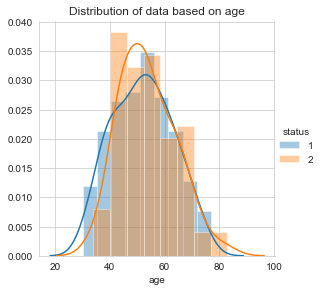

In [7]:
data_1=data[data['status']==1]
data_2=data[data['status']==2]

sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'age').add_legend()
plt.title('Distribution of data based on age')
plt.show()

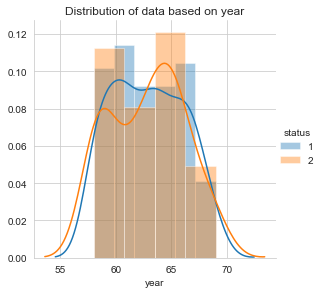

In [8]:
g=sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'year').add_legend()
plt.title('Distribution of data based on year')
plt.show()

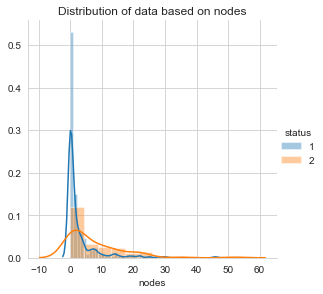

In [9]:
sns.FacetGrid(data,hue='status',height=4).map(sns.distplot,'nodes').add_legend()
plt.title('Distribution of data based on nodes')
plt.show()

Conclusion:

Dataset is highly imbalanced,after drawing plots using age, nodes or year, we can not predict that patient has survived 5 or more years or not.

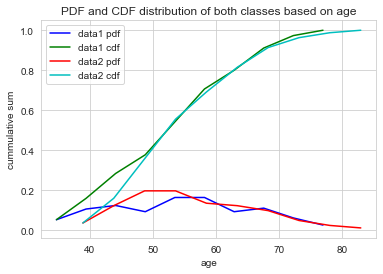

In [10]:
count,bins= np.histogram(data_1['age'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)
plt.plot(bins[1:],pdf,'b',label='data1 pdf')
plt.plot(bins[1:],cdf,'g',label='data1 cdf')

count,bins= np.histogram(data_2['age'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)

plt.plot(bins[1:],pdf,'r',label='data2 pdf')
plt.plot(bins[1:],cdf,'c',label='data2 cdf')
plt.xlabel('age')
plt.ylabel('cummulative sum')
plt.legend()
plt.title('PDF and CDF distribution of both classes based on age')
plt.show()

Conclusion:

If age is less than 38, then patient has survived for 5 or more years. If patient has age >77, then patient has survived within 5 years only.

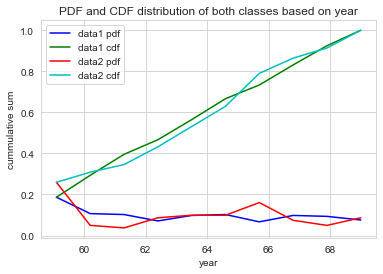

In [11]:
count,bins= np.histogram(data_1['year'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)

plt.plot(bins[1:],pdf,'b',label='data1 pdf')
plt.plot(bins[1:],cdf,'g',label='data1 cdf')
count,bins= np.histogram(data_2['year'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)

plt.plot(bins[1:],pdf,'r',label='data2 pdf')
plt.plot(bins[1:],cdf,'c',label='data2 cdf')
plt.xlabel('year')
plt.ylabel('cummulative sum')
plt.legend()
plt.title('PDF and CDF distribution of both classes based on year')
plt.show()

Conclusion: Year of operation does not able to distinguish 2 classes.

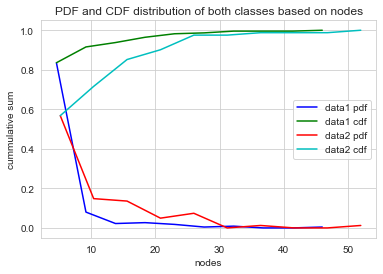

In [12]:
count,bins= np.histogram(data_1['nodes'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)

plt.plot(bins[1:],pdf,'b',label='data1 pdf')
plt.plot(bins[1:],cdf,'g',label='data1 cdf')

count,bins= np.histogram(data_2['nodes'],bins=10,density=True)

pdf=count/sum(count)
cdf= np.cumsum(pdf)

plt.plot(bins[1:],pdf,'r',label='data2 pdf')
plt.plot(bins[1:],cdf,'c',label='data2 cdf')
plt.xlabel('nodes')
plt.ylabel('cummulative sum')
plt.title('PDF and CDF distribution of both classes based on nodes')
plt.legend()
plt.show()

Conclusion:

Based on nodes, we can not conclude anything about class because it will lead to significant errors for both the classes.

Boxplots



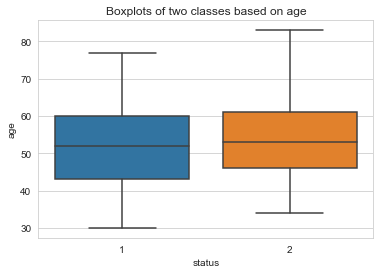

In [14]:
sns.boxplot(x='status',y='age',data=data)
plt.title('Boxplots of two classes based on age')
plt.show()

50th and 75th percentile is approximately same for both the classes.

If we do like this:

if age<=47: then print('class1') else: then print('choice ambiguious')

we can see that 25% of negative(class-2) examples are misclassified from above code.

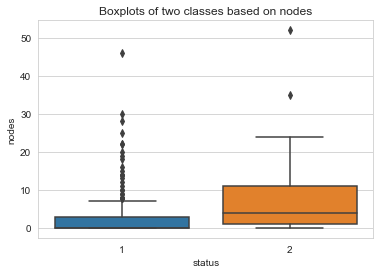

In [15]:
sns.boxplot(x='status',y='nodes',data=data)
plt.title('Boxplots of two classes based on nodes')
plt.show()

if nodes<=2: print(class 1)

elif nodes>8: print(class 2)

else: print('choice ambiguious')

We can see 25% of negative(class-2) examples are misclassified from above code.

If no. of active node is 0, patient is likely to survive by >=5 years.

Violin Plots:

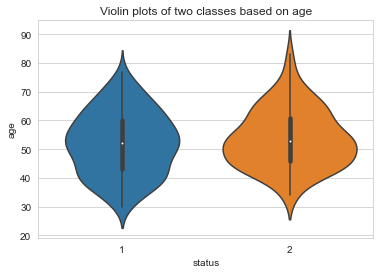

In [17]:
sns.violinplot(x='status',y='age',data=data)
plt.title('Violin plots of two classes based on age')
plt.show()

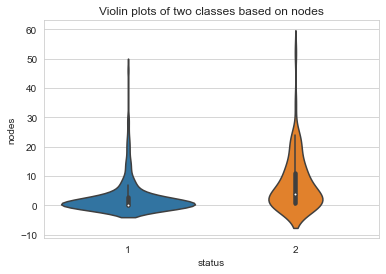

In [18]:
sns.violinplot(x='status',y='nodes',data=data)
plt.title('Violin plots of two classes based on nodes')
plt.show()

Final Remarks:

1. Bivariate analysis(Scatter plots or pairplots) doesn't help to distinguish two classes because of lot of overlapping.

2. Using Univariate analysis, by plotting distribution plot without pdf/cdf also doesn't help much because of high overlapping of two classes.

3. Plots using PDF/CDF, give some slight information to distinguish classes in some cases. Ofcourse, not able to distinguish completely in this case also.

4. Plots using Boxplot and violinplots, gives some more information like 50 percentile and 75 percentile are approximately same for both the classes. If no. of active node is 0, patient is likely to survive by >=5 years. Here also, we are not able to distinguish completely.